## Imports and Loads

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from importlib import reload
import src.utils.utils
reload(src.utils.utils)

<module 'src.utils.utils' from '/Users/abbassi/Desktop/NAJMEDDINE/EPFL/ADA/Projet/ada-2024-project-melyn/src/utils/utils.py'>

In [137]:
data_folder = './data/'
pickle_folder = data_folder + 'pickle/'
imdb_folder = data_folder + 'IMDB/'
cmu_folder = data_folder + 'CMU/'

with open(pickle_folder + 'movies_clean.p', 'rb') as f:
    movie_data = pickle.load(f)

## Preparation of the data for the modeling

In [138]:
df_mod = movie_data.copy()

In [139]:
df_mod.columns.to_list()

['Wikipedia_movie_ID',
 'Movie_name',
 'Movie_box_office_revenue',
 'Year',
 'Year_Interval',
 'nb_of_Genres',
 'Genre_Action',
 'Genre_Action/Adventure',
 'Genre_Adventure',
 'Genre_Animation',
 'Genre_Biographical film',
 'Genre_Biography',
 'Genre_Black comedy',
 'Genre_Black-and-white',
 'Genre_Bollywood',
 'Genre_Chinese Movies',
 'Genre_Comedy',
 'Genre_Comedy film',
 'Genre_Comedy-drama',
 'Genre_Crime Fiction',
 'Genre_Crime Thriller',
 'Genre_Documentary',
 'Genre_Drama',
 'Genre_Family Drama',
 'Genre_Family Film',
 'Genre_Fantasy',
 'Genre_Film adaptation',
 'Genre_Horror',
 'Genre_Indie',
 'Genre_Japanese Movies',
 'Genre_LGBT',
 'Genre_Musical',
 'Genre_Mystery',
 'Genre_Other',
 'Genre_Period piece',
 'Genre_Psychological thriller',
 'Genre_Romance Film',
 'Genre_Romantic comedy',
 'Genre_Romantic drama',
 'Genre_Science Fiction',
 'Genre_Short Film',
 'Genre_Silent film',
 'Genre_Sports',
 'Genre_Thriller',
 'Genre_War film',
 'Genre_Western',
 'Genre_World cinema',
 'nb

In [140]:
# Drop some columns
df_mod.drop(columns=['Movie_name', 'Wikipedia_movie_ID', 'Year_Interval'], inplace=True)

In [141]:
df_mod.dtypes

Movie_box_office_revenue            float64
Year                                  int64
nb_of_Genres                          int64
Genre_Action                           bool
Genre_Action/Adventure                 bool
                                     ...   
Country_Other                          bool
Country_United Kingdom                 bool
Country_United States of America       bool
averageRating                       float64
numVotes                            float64
Length: 70, dtype: object

# Modeling

## Average Rating

We begin by training models, taking the average rating feature as the target y. 

We standardize the features and stores the new values in X_train_scaled and X_test scaled for models that needs standardized data.

In [154]:
# Define features and target
X = df_mod.drop(columns=['Movie_box_office_revenue','averageRating'])
y = df_mod['averageRating']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [155]:
def compute_MSE_R2score(model,X_train,X_test,y_train,y_test):
    model_name = type(model).__name__
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"\n{model_name} RMSE: ", np.sqrt(mse))
    print(f"{model_name} R2: ", r2)
    return np.sqrt(mse), r2

### Models Training

We evaluate 7 differents regression models on the data : 

- Linear Regression
- Ridge Regression
- Random Forest
- XGBoost
- Bagging
- Gradient Boosting
- Decision Tree

We use their MSE and R squared score to compare them.

In [156]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

# Train a Linear regression model
lr = LinearRegression()
mse_lr,_ = compute_MSE_R2score(lr,X_train_scaled,X_test_scaled,y_train,y_test)

# Train and predict a Ridge regression model
ridge = Ridge(alpha=1.0)
mse_ridge,_ = compute_MSE_R2score(ridge,X_train_scaled,X_test_scaled,y_train,y_test)

# Train and predict a Random Forest model
rf = RandomForestRegressor(random_state=42)
mse_rf,_ = compute_MSE_R2score(rf,X_train,X_test,y_train,y_test)

# Train an XGBoost model
xgb = XGBRegressor(random_state=42)
mse_xgb,_ = compute_MSE_R2score(xgb,X_train,X_test,y_train,y_test)

# Train a Bagging Regressor model
bag = BaggingRegressor(random_state=42)
mse_bag,_ = compute_MSE_R2score(bag,X_train,X_test,y_train,y_test)

# Train a Gradient Boosting model
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
mse_gb,_ = compute_MSE_R2score(gb,X_train,X_test,y_train,y_test)

# Train a Decision Tree model
dt = DecisionTreeRegressor(random_state=42)
mse_dt,_ = compute_MSE_R2score(dt,X_train,X_test,y_train,y_test)


LinearRegression RMSE:  0.8321169714374292
LinearRegression R2:  0.37063273413298137

Ridge RMSE:  0.8321182642005206
Ridge R2:  0.37063077858242266

RandomForestRegressor RMSE:  0.6986353727830434
RandomForestRegressor R2:  0.5563540380323351

XGBRegressor RMSE:  0.6763663629593542
XGBRegressor R2:  0.5841857258741414

BaggingRegressor RMSE:  0.740930060664788
BaggingRegressor R2:  0.5010123214641466

GradientBoostingRegressor RMSE:  0.7091455141816192
GradientBoostingRegressor R2:  0.5429053780077898

DecisionTreeRegressor RMSE:  0.9726929762097791
DecisionTreeRegressor R2:  0.14002277233119298


## Comparison of the mean squared error of the models

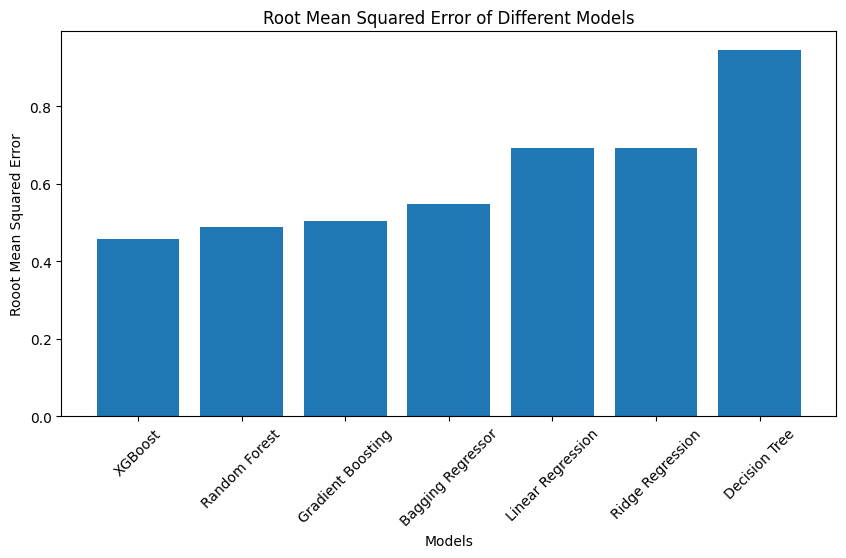

In [157]:
# Comparison the mean squared error of the models
models = ['Linear Regression', 'Ridge Regression', 'Random Forest', 'XGBoost', 'Bagging Regressor', 'Gradient Boosting', 'Decision Tree']
errors = [mse_lr, mse_ridge, mse_rf, mse_xgb, mse_bag, mse_gb, mse_dt]

sorted_pairs = sorted(zip(errors, models))
sorted_errors, sorted_models = zip(*sorted_pairs)

plt.figure(figsize=(10, 5))
plt.bar(sorted_models, sorted_errors)
plt.xlabel('Models')
plt.ylabel('Rooot Mean Squared Error')
plt.title('Root Mean Squared Error of Different Models')
plt.xticks(rotation=45)
plt.show()

Therefore, XGBoost and Random Forest seems to be the two best models to predict the average rating of a movie. We will then use both models to evaluate the importance and impact of each features on the average rating.

## Feature Importance of the two best models

In [158]:
def plot_feature_importance(model,X):
    # Get feature importance for the model
    importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_}).sort_values(by='Importance', ascending=False)
    
    # Plot the feature importance for the model
    plt.figure(figsize=(10, 15))
    plt.barh(importance_df['Feature'], importance_df['Importance'])
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.show()

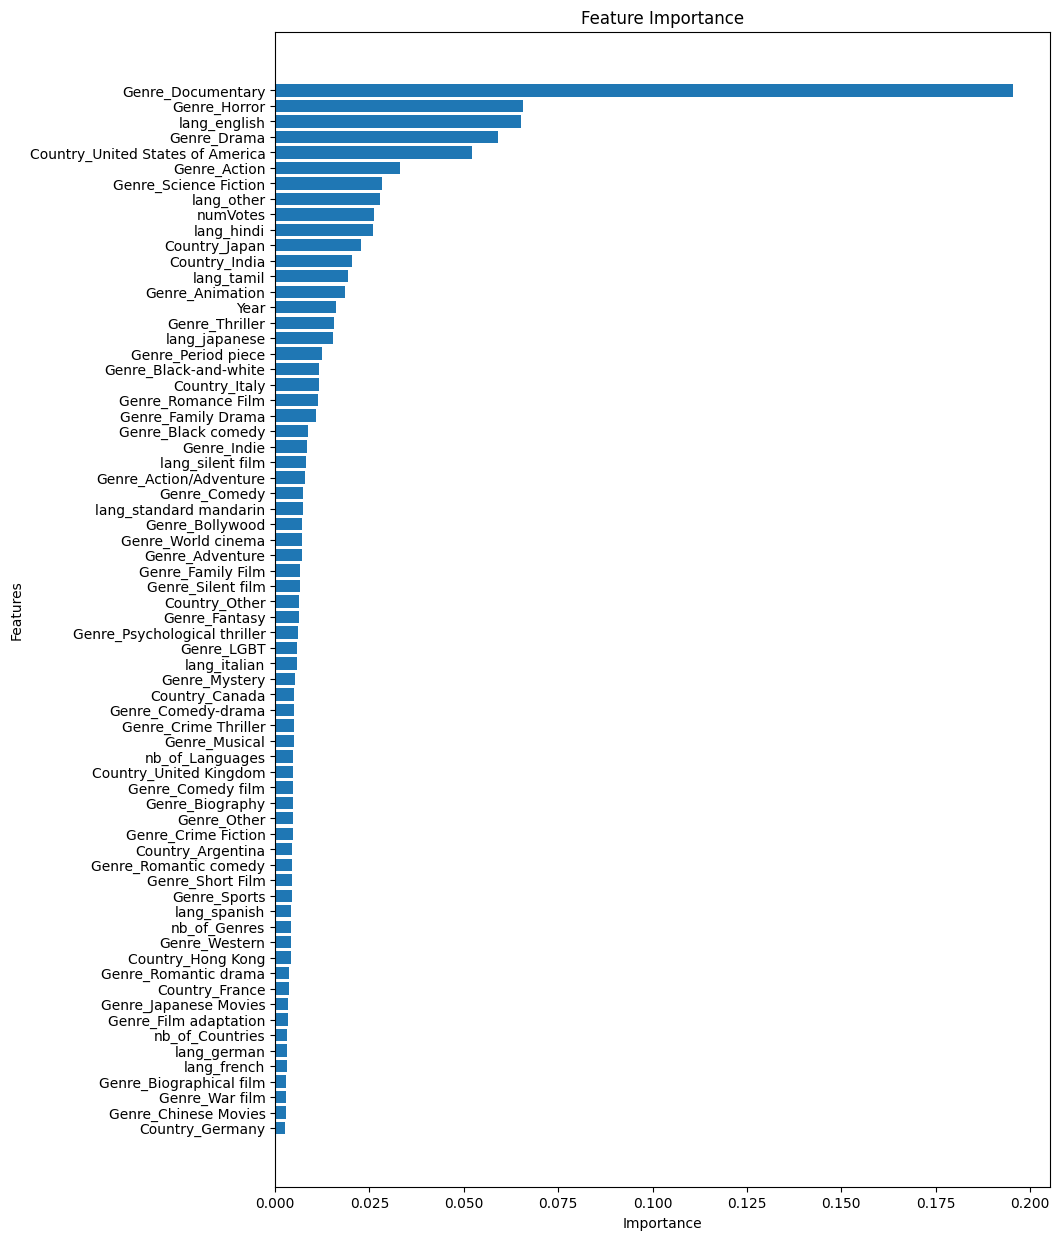

In [159]:
# Feature Importance for the XGBoost model
plot_feature_importance(xgb,X)

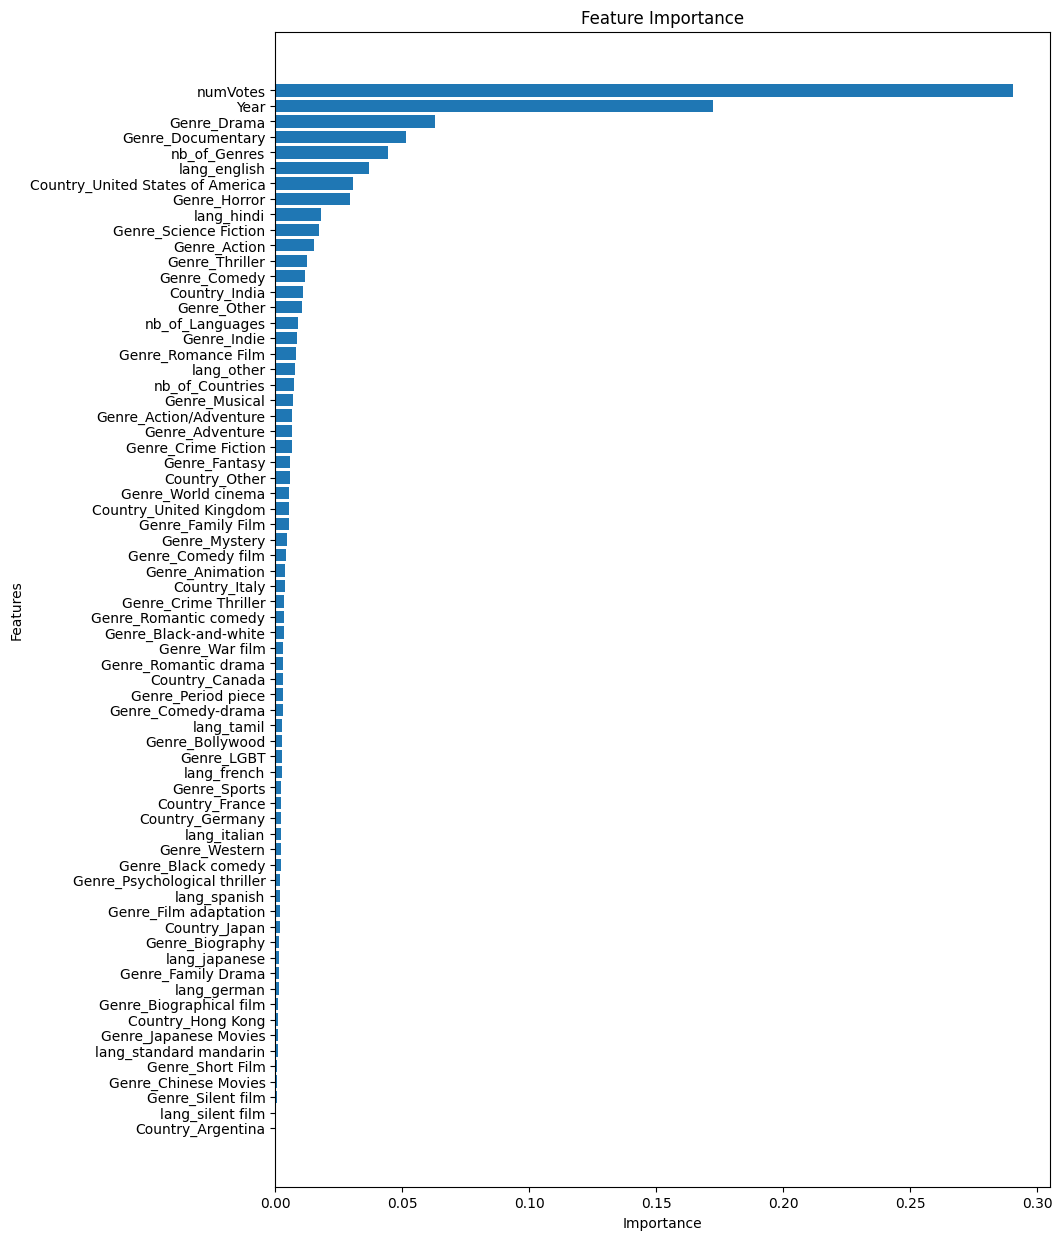

In [160]:
# Feature Importance for the Random Forest model
plot_feature_importance(rf,X)

## Box Office Revenue

In [161]:
df_mod_clean = df_mod.dropna(subset='Movie_box_office_revenue')
cpi = pd.read_csv("./data/CPI.csv")

cpi = pd.DataFrame(cpi.groupby('year').apply(lambda x: x['value'].min(),include_groups=False),columns=['cpi'])
base_cpi = cpi.loc[2015].values[0]

df_mod_cpi = df_mod_clean.merge(cpi,left_on='Year',right_on='year',how='left')
df_mod_cpi['Adjusted_Revenue'] = df_mod_cpi['Movie_box_office_revenue']*(base_cpi/df_mod_cpi['cpi'])
df_mod_cpi

,Movie_box_office_revenue,Year,nb_of_Genres,Genre_Action,Genre_Action/Adventure,Genre_Adventure,Genre_Animation,Genre_Biographical film,Genre_Biography,Genre_Black comedy,...,Country_India,Country_Italy,Country_Japan,Country_Other,Country_United Kingdom,Country_United States of America,averageRating,numVotes,cpi,Adjusted_Revenue
0,21502796.0,1992,12,True,True,False,False,False,False,True,...,False,False,False,False,False,True,7.4,197717.0,119.200,2.296181e+07
1,50000000.0,1915,7,False,False,False,False,False,False,False,...,False,False,False,False,False,True,6.1,26681.0,8.700,7.315402e+08
2,33139618.0,1982,12,False,False,False,False,False,False,False,...,False,False,False,False,False,True,8.1,835060.0,89.200,4.729009e+07
3,119500000.0,1974,3,False,False,False,False,False,False,False,...,False,False,False,False,False,True,7.7,155432.0,41.500,3.665281e+08
4,8551228.0,1986,3,False,False,False,False,False,False,False,...,False,False,False,False,False,True,7.7,219742.0,100.000,1.088469e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6905,1000000.0,1953,1,False,False,False,False,False,False,False,...,False,False,False,False,False,True,5.4,505.0,24.900,5.111968e+06
6906,1000000.0,1953,3,False,False,True,False,False,False,False,...,False,False,False,False,False,True,6.3,397.0,24.900,5.111968e+06
6907,1025000.0,1951,1,False,False,False,False,False,False,False,...,False,False,False,False,False,True,6.1,243.0,23.700,5.505072e+06
6908,33449086.0,2012,1,False,False,False,False,False,False,False,...,False,False,False,False,False,True,4.8,11049.0,124.128,3.430062e+07


In [231]:
# Define features and target
X = df_mod_cpi.drop(columns=['Movie_box_office_revenue','averageRating','cpi','Adjusted_Revenue'])
y = df_mod_cpi['Adjusted_Revenue']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [232]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

# Train a Linear regression model
lr = LinearRegression()
mse_lr,_ = compute_MSE_R2score(lr,X_train_scaled,X_test_scaled,y_train,y_test)

# Train and predict a Ridge regression model
ridge = Ridge(alpha=1.0)
mse_ridge,_ = compute_MSE_R2score(ridge,X_train_scaled,X_test_scaled,y_train,y_test)

# Train and predict a Random Forest model
rf = RandomForestRegressor(random_state=42)
mse_rf,_ = compute_MSE_R2score(rf,X_train,X_test,y_train,y_test)

display(X_train.shape,X_test.shape)
# Train an XGBoost model
xgb = XGBRegressor(random_state=42)
mse_xgb,_ = compute_MSE_R2score(xgb,X_train,X_test,y_train,y_test)

# Train a Bagging Regressor model
bag = BaggingRegressor(random_state=42)
mse_bag,_ = compute_MSE_R2score(bag,X_train,X_test,y_train,y_test)

# Train a Gradient Boosting model
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
mse_gb,_ = compute_MSE_R2score(gb,X_train,X_test,y_train,y_test)

# Train a Decision Tree model
dt = DecisionTreeRegressor(random_state=42)
mse_dt,_ = compute_MSE_R2score(dt,X_train,X_test,y_train,y_test)


LinearRegression RMSE:  168082735.671273
LinearRegression R2:  0.29874004014019695

Ridge RMSE:  168084601.96557975
Ridge R2:  0.29872446727685364

RandomForestRegressor RMSE:  152225644.96814978
RandomForestRegressor R2:  0.42481378084128596


(5528, 68)

(1382, 68)


XGBRegressor RMSE:  152395388.86774796
XGBRegressor R2:  0.4235303073903711

BaggingRegressor RMSE:  148426423.78904137
BaggingRegressor R2:  0.4531662966190443

GradientBoostingRegressor RMSE:  164338047.8221217
GradientBoostingRegressor R2:  0.3296384846650172

DecisionTreeRegressor RMSE:  158721257.3883853
DecisionTreeRegressor R2:  0.37467899490308587


## Modeling per Year_Interval

In [212]:
df_mod_2 = movie_data.copy()

In [213]:
df_mod_2.drop(columns=['Movie_name', 'Wikipedia_movie_ID'], inplace=True)

In [214]:
df_mod_2.columns.to_list()

['Movie_box_office_revenue',
 'Year',
 'Year_Interval',
 'nb_of_Genres',
 'Genre_Action',
 'Genre_Action/Adventure',
 'Genre_Adventure',
 'Genre_Animation',
 'Genre_Biographical film',
 'Genre_Biography',
 'Genre_Black comedy',
 'Genre_Black-and-white',
 'Genre_Bollywood',
 'Genre_Chinese Movies',
 'Genre_Comedy',
 'Genre_Comedy film',
 'Genre_Comedy-drama',
 'Genre_Crime Fiction',
 'Genre_Crime Thriller',
 'Genre_Documentary',
 'Genre_Drama',
 'Genre_Family Drama',
 'Genre_Family Film',
 'Genre_Fantasy',
 'Genre_Film adaptation',
 'Genre_Horror',
 'Genre_Indie',
 'Genre_Japanese Movies',
 'Genre_LGBT',
 'Genre_Musical',
 'Genre_Mystery',
 'Genre_Other',
 'Genre_Period piece',
 'Genre_Psychological thriller',
 'Genre_Romance Film',
 'Genre_Romantic comedy',
 'Genre_Romantic drama',
 'Genre_Science Fiction',
 'Genre_Short Film',
 'Genre_Silent film',
 'Genre_Sports',
 'Genre_Thriller',
 'Genre_War film',
 'Genre_Western',
 'Genre_World cinema',
 'nb_of_Languages',
 'lang_english',
 'lan

In [215]:
df_mod_2.dtypes

Movie_box_office_revenue            float64
Year                                  int64
Year_Interval                        object
nb_of_Genres                          int64
Genre_Action                           bool
                                     ...   
Country_Other                          bool
Country_United Kingdom                 bool
Country_United States of America       bool
averageRating                       float64
numVotes                            float64
Length: 71, dtype: object

#### Using XGBoost model

Analyzing period: 1970-2000

XGBRegressor RMSE:  0.6781064770819992
XGBRegressor R2:  0.47930495059494427


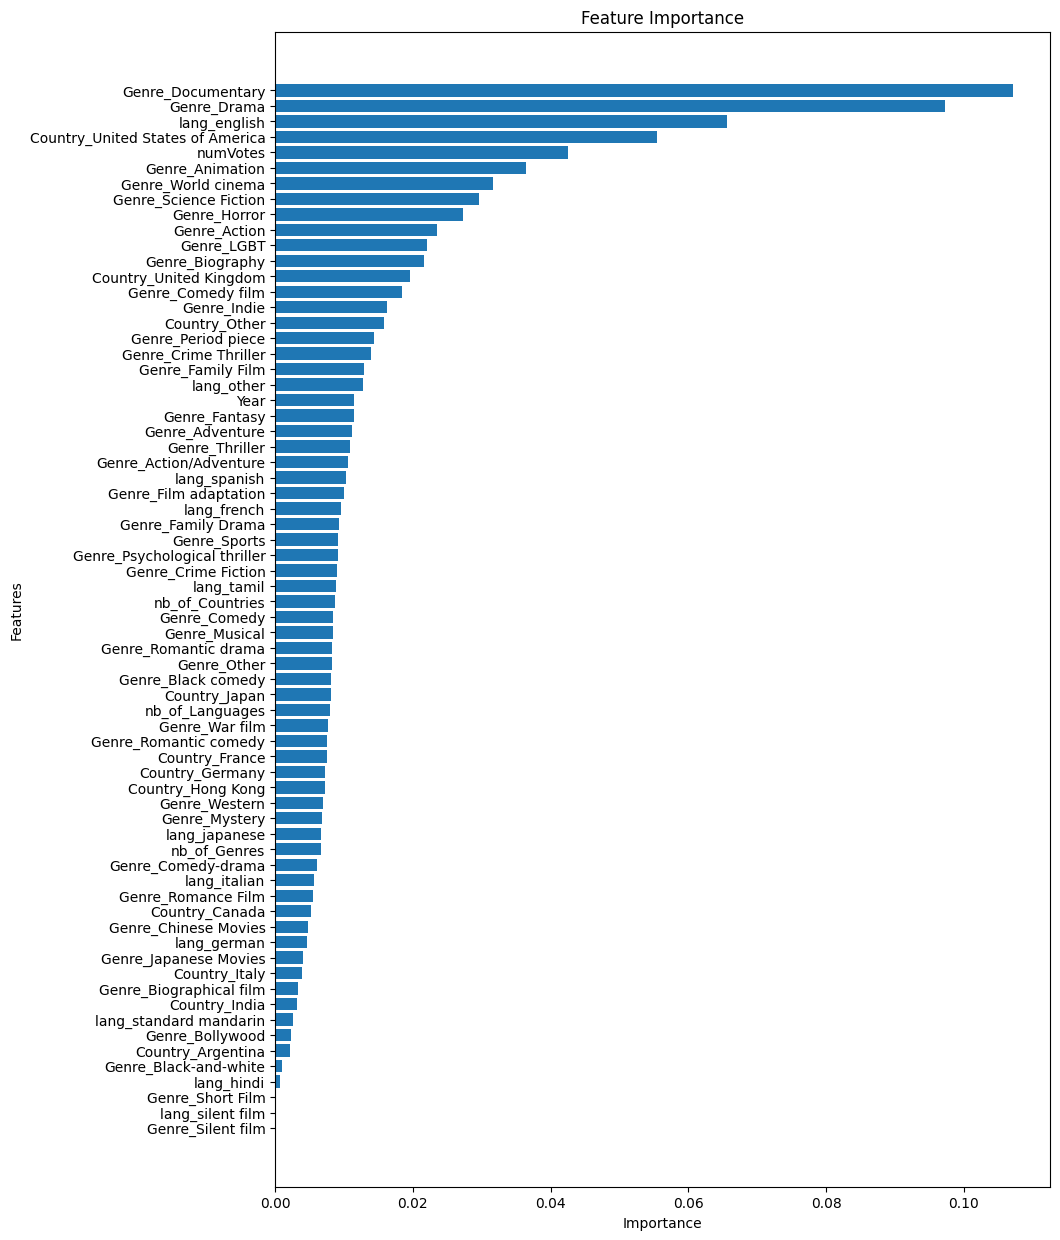

Analyzing period: 1915-1930

XGBRegressor RMSE:  0.7173962844076114
XGBRegressor R2:  0.33214475595311244


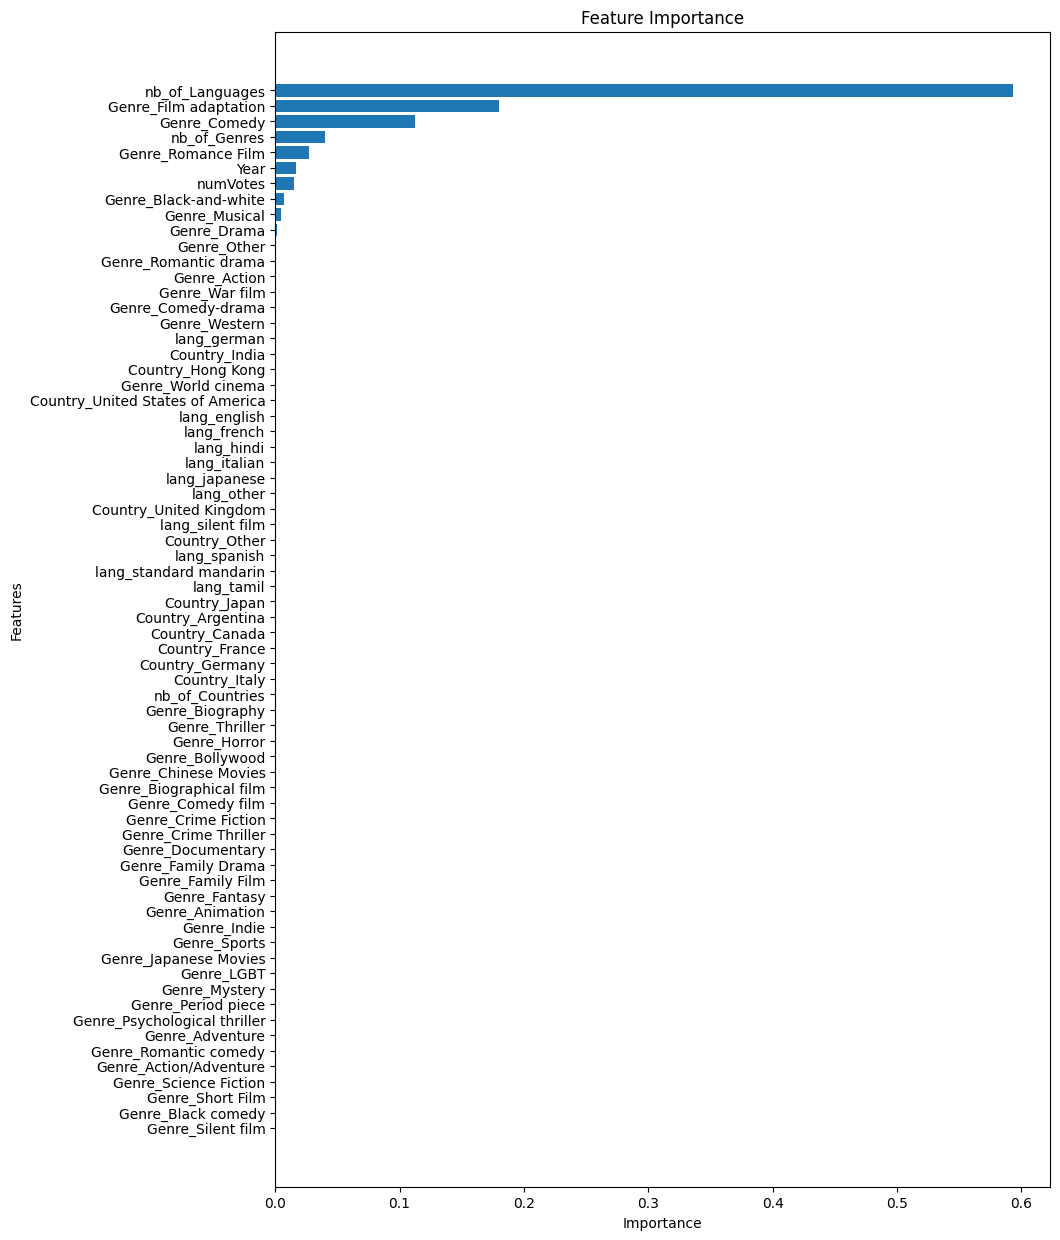

Analyzing period: 1930-1950

XGBRegressor RMSE:  0.4063206063353362
XGBRegressor R2:  0.64053670521358


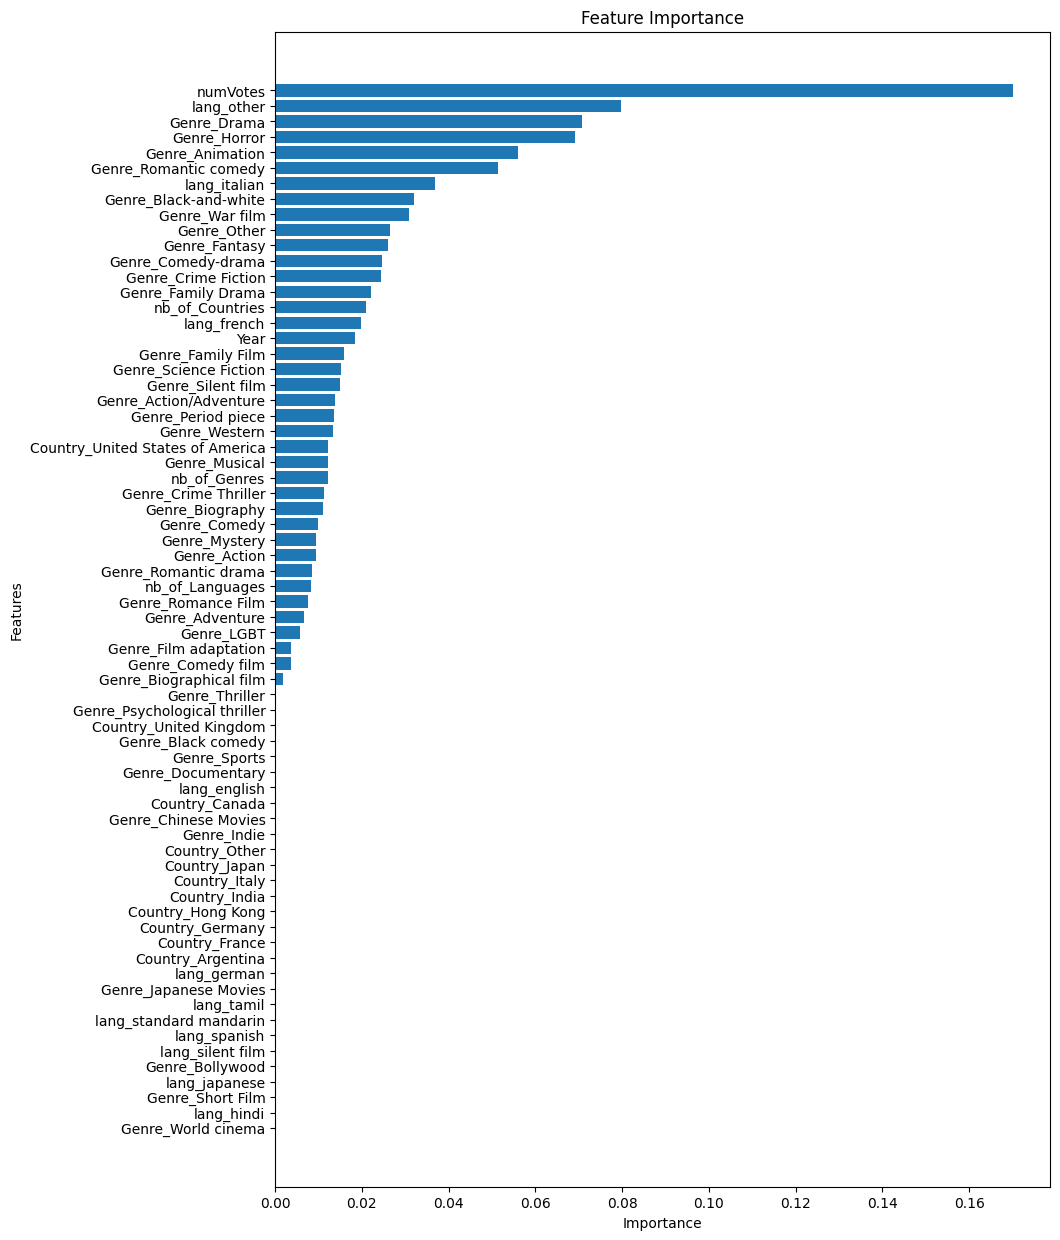

Analyzing period: 1950-1970

XGBRegressor RMSE:  0.5356857394743968
XGBRegressor R2:  0.4360880549130486


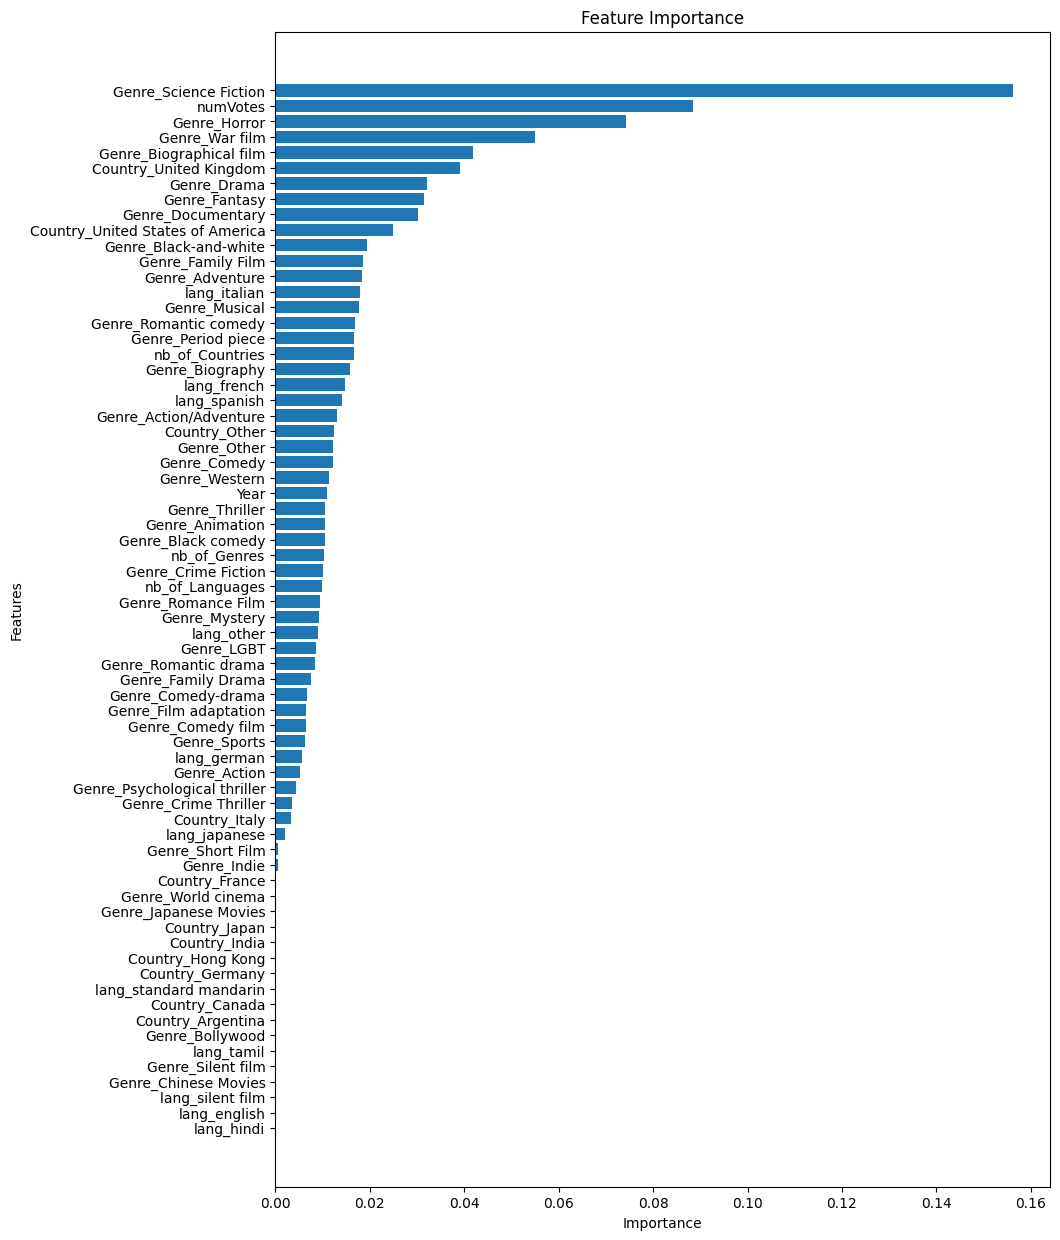

Analyzing period: 2000-2015

XGBRegressor RMSE:  0.6772800940802158
XGBRegressor R2:  0.5123345069450754


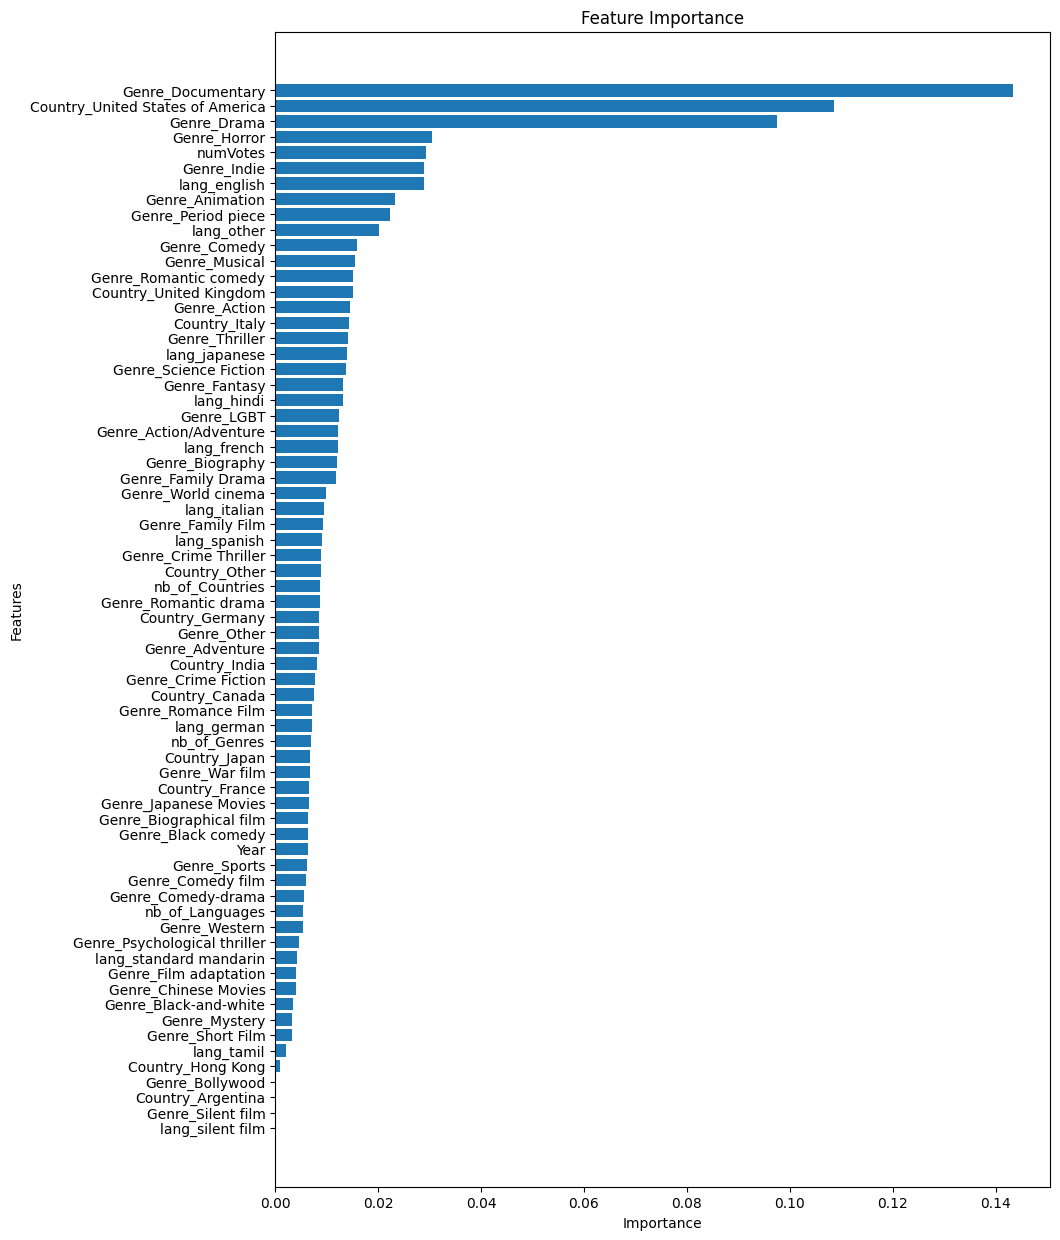

In [225]:
def plot_importance_per_period(df,model,target):
    # Iterate through the unique periods in 'Year_interval'
    for period in df['Year_Interval'].unique():
        print(f"Analyzing period: {period}")
        
        # Filter the DataFrame for the current period
        df_period = df[df['Year_Interval'] == period]
        
        # Define features and target
        X_ = df_period.drop(columns=['Movie_box_office_revenue','averageRating', 'Year_Interval'])
        y_ = df_period[target]
        
        # Split data
        X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=0.2, random_state=42)
        
        # Standardize features
        scaler_ = StandardScaler()
        X_train_scaled_ = scaler_.fit_transform(X_train_)
        X_test_scaled_ = scaler_.transform(X_test_)

        compute_MSE_R2score(model,X_train_scaled_,X_test_scaled_,y_train_,y_test_)
        plot_feature_importance(model,X_)

# Train an XGBoost model
xgb_ = XGBRegressor(random_state=42)
plot_importance_per_period(df_mod_2,xgb_,'averageRating')

Analyzing period: 1970-2000

XGBRegressor RMSE:  86630476.62104082
XGBRegressor R2:  0.47455836236493854


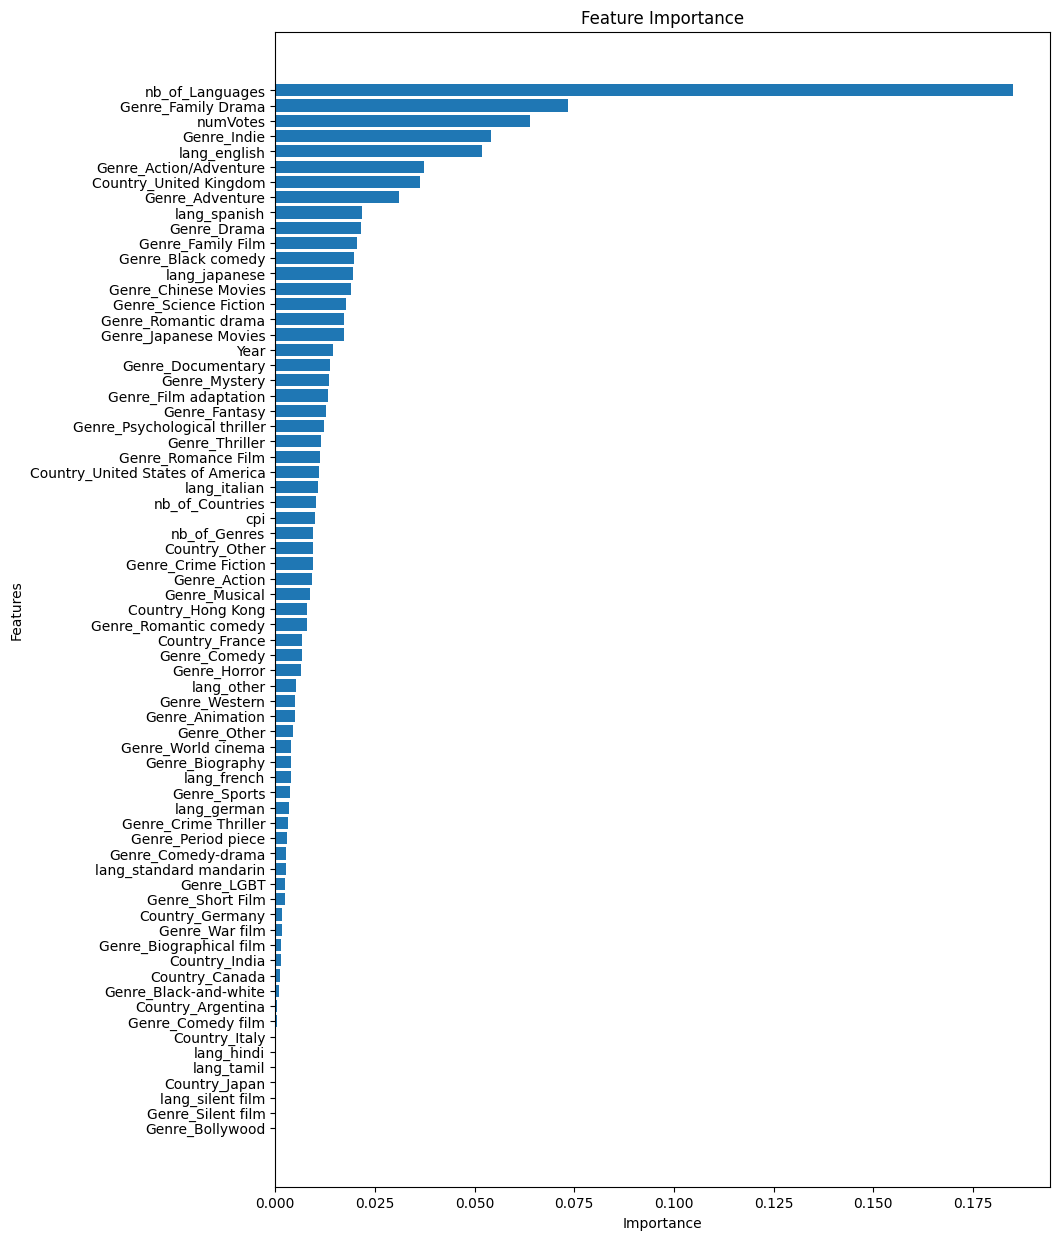

Analyzing period: 1915-1930

XGBRegressor RMSE:  16620820.914008355
XGBRegressor R2:  -3.030084870402413


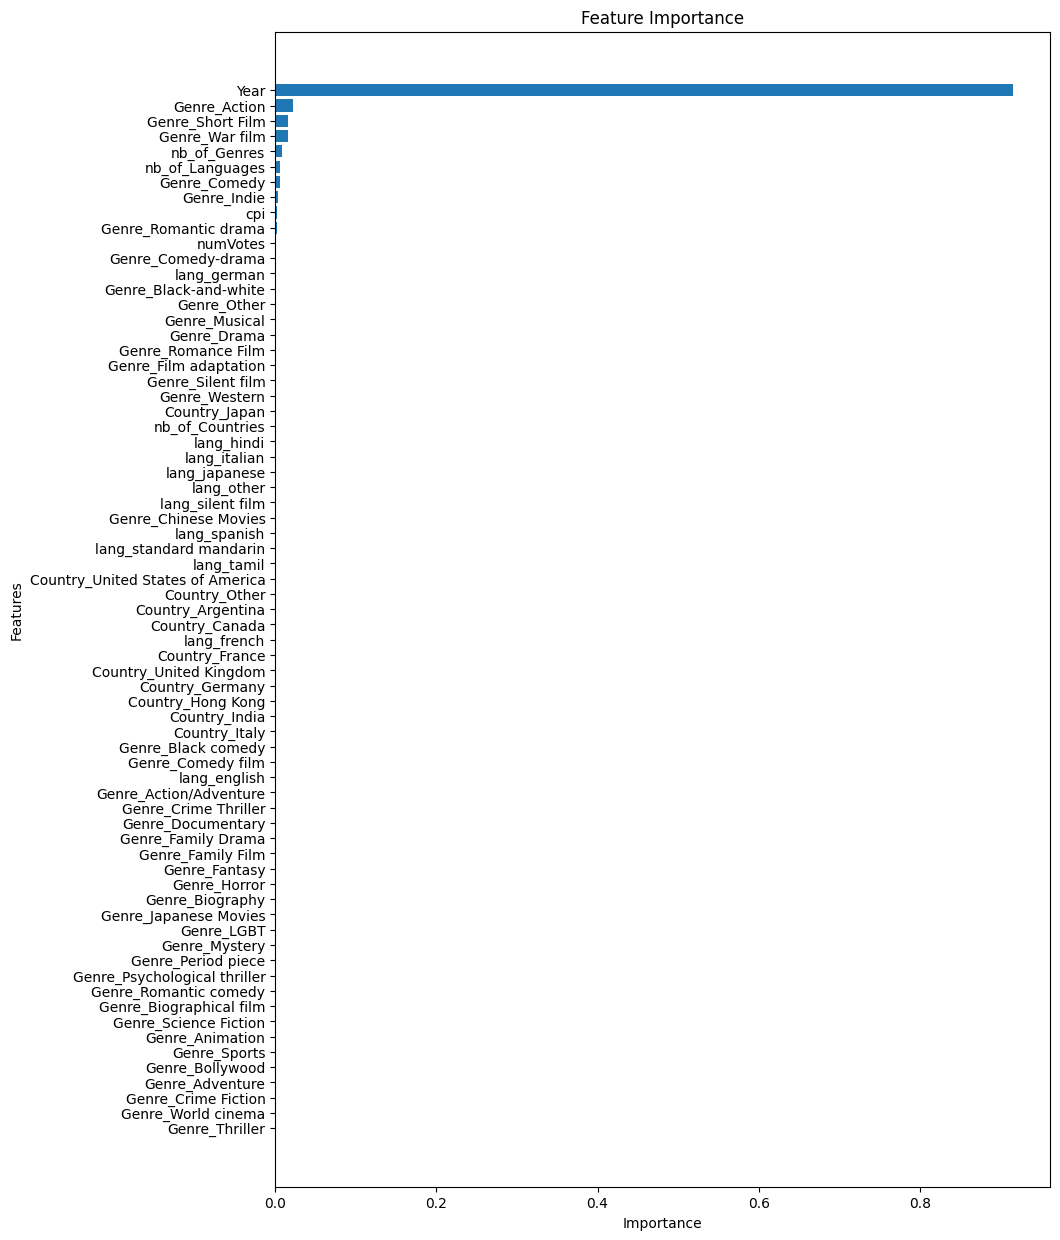

Analyzing period: 1930-1950

XGBRegressor RMSE:  546017506.6750038
XGBRegressor R2:  -0.015785776931520834


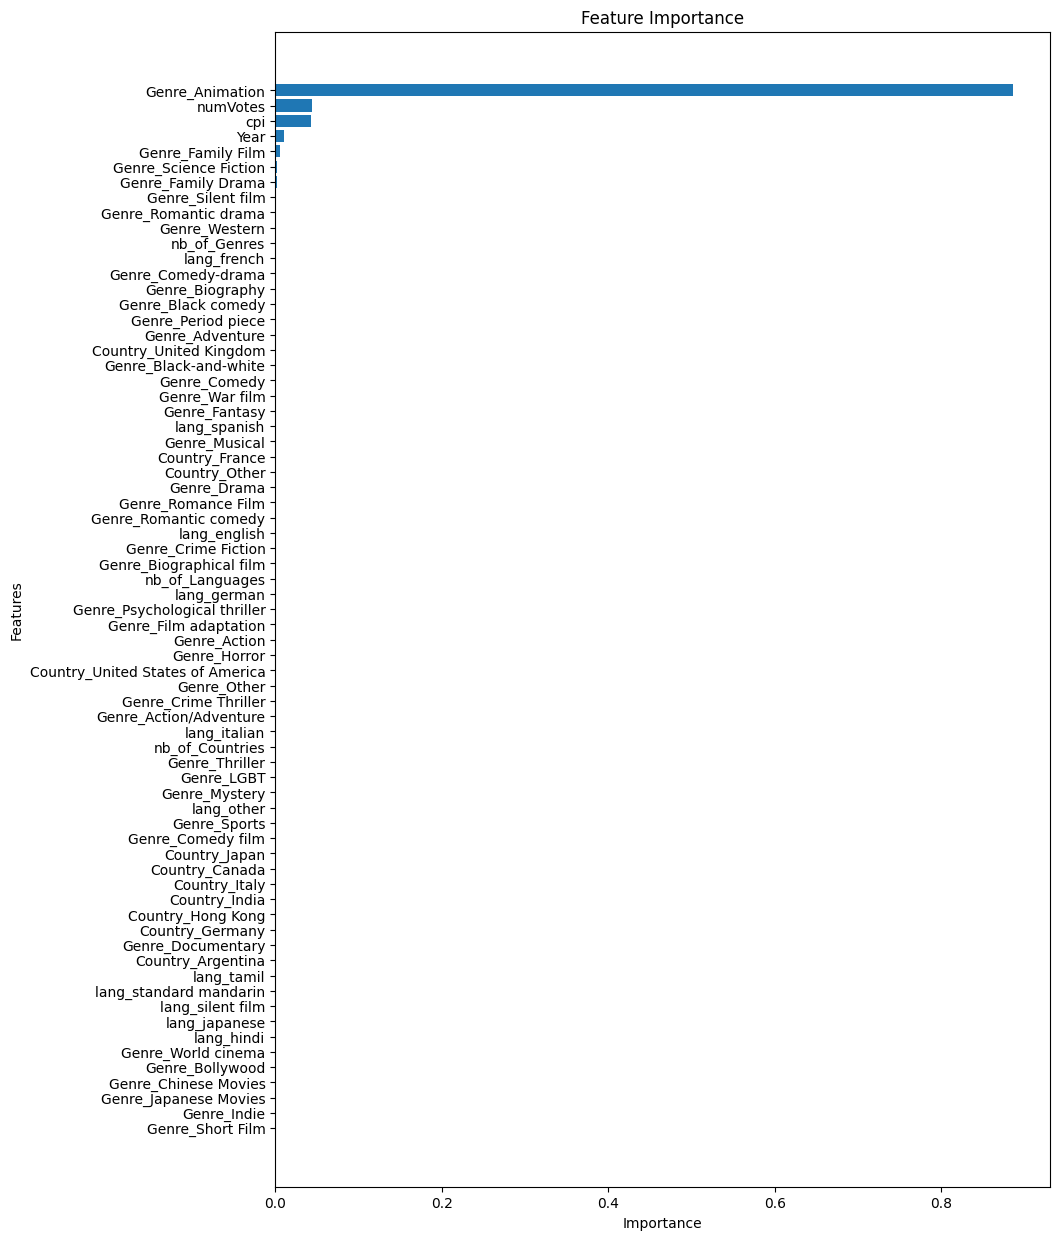

Analyzing period: 1950-1970

XGBRegressor RMSE:  97306151.68423663
XGBRegressor R2:  0.2515488631088689


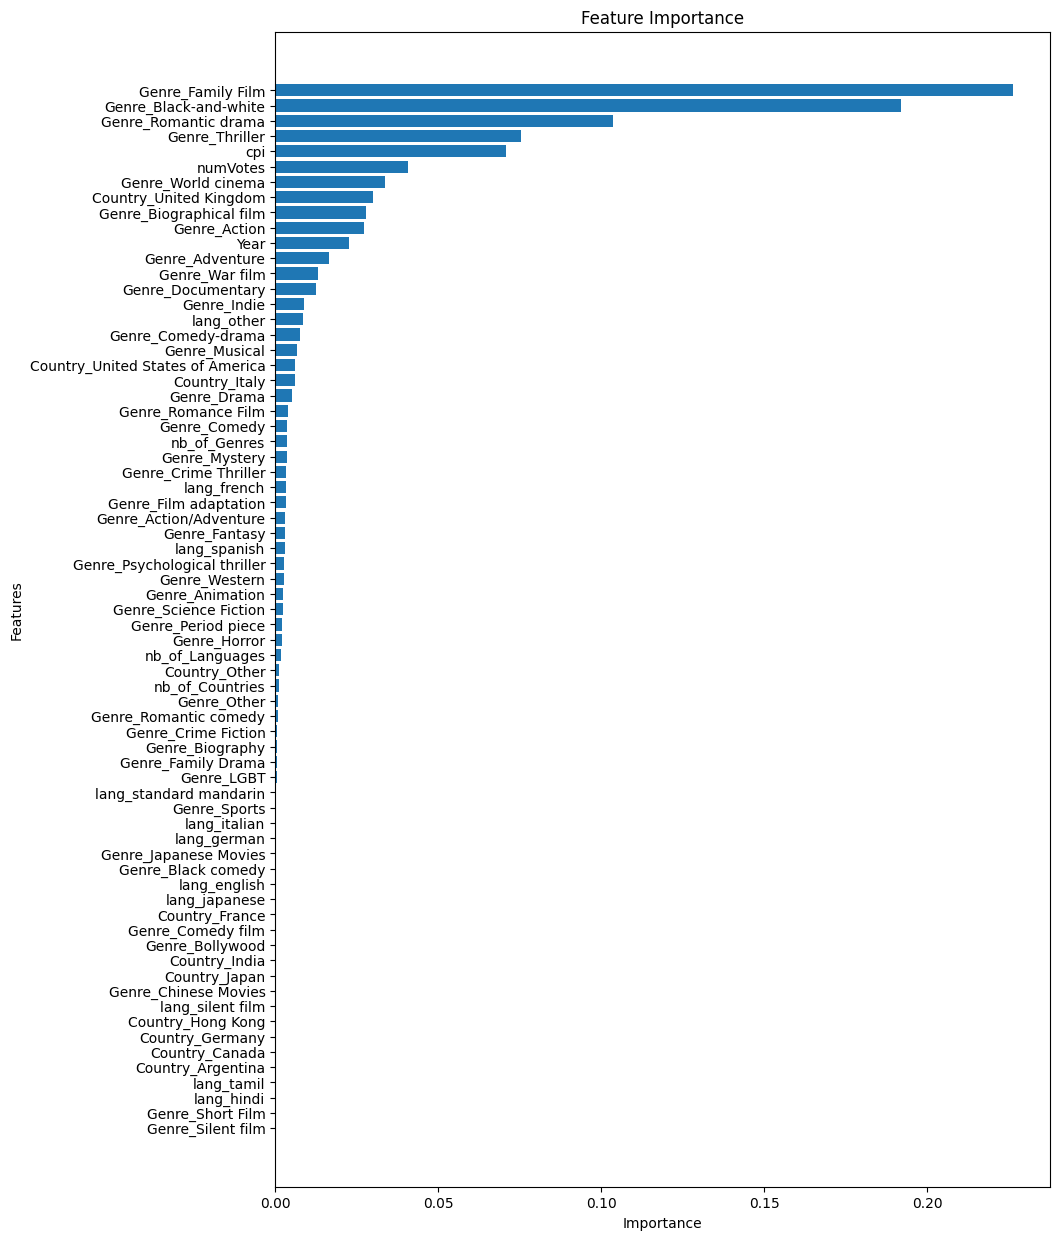

Analyzing period: 2000-2015

XGBRegressor RMSE:  93431744.00908013
XGBRegressor R2:  0.6242408434450439


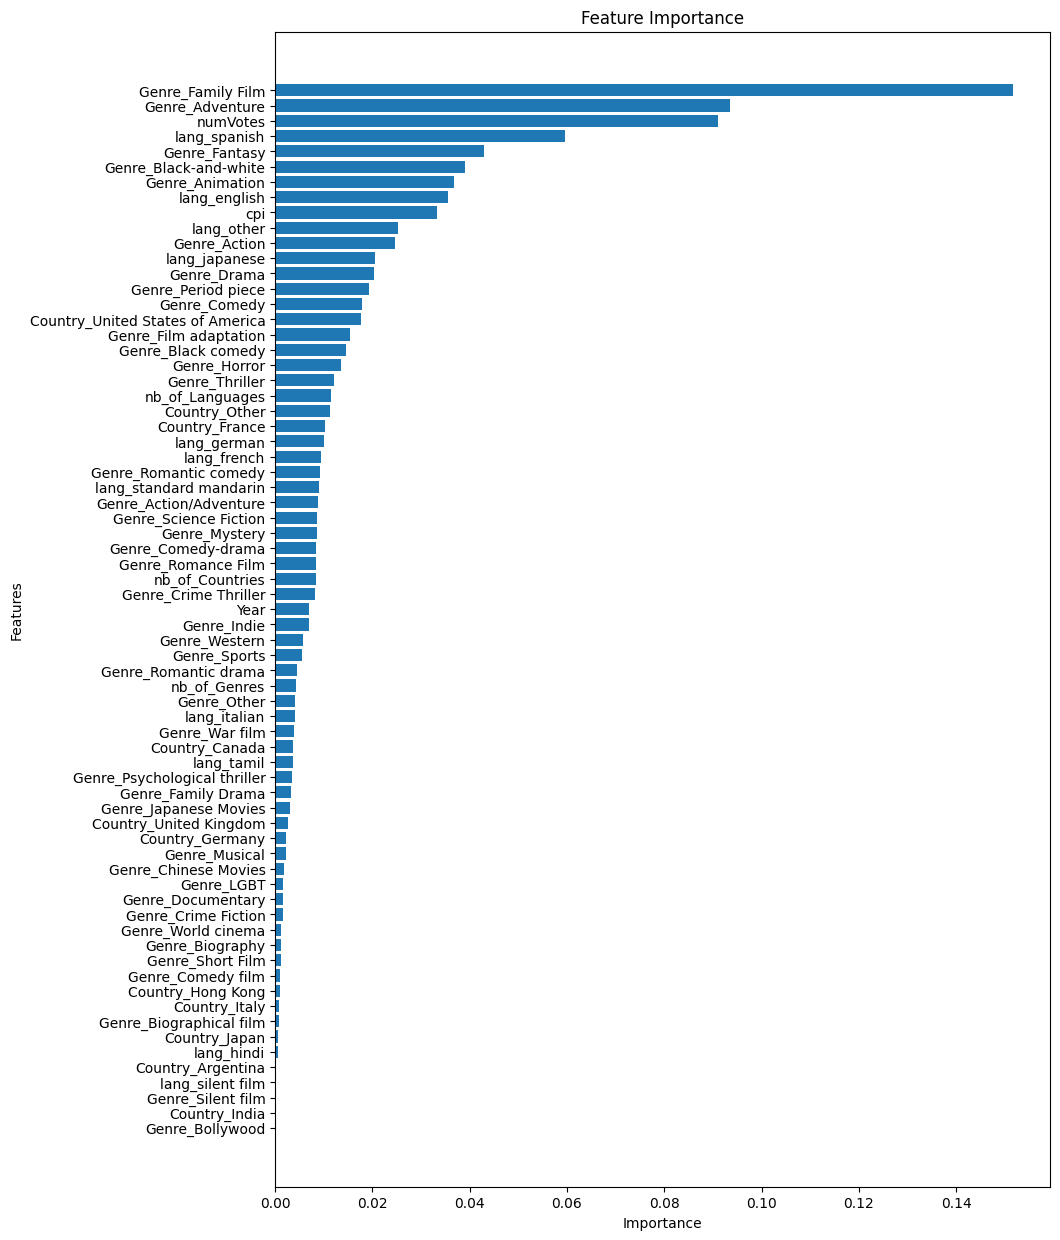

In [227]:
df_mod_clean_2 = df_mod_2.dropna(subset='Movie_box_office_revenue')
cpi = pd.read_csv("./data/CPI.csv")

cpi = pd.DataFrame(cpi.groupby('year').apply(lambda x: x['value'].min(),include_groups=False),columns=['cpi'])
base_cpi = cpi.loc[2015].values[0]

df_mod_cpi_2 = df_mod_clean_2.merge(cpi,left_on='Year',right_on='year',how='left')
df_mod_cpi_2['Movie_box_office_revenue'] = df_mod_cpi_2['Movie_box_office_revenue']*(base_cpi/df_mod_cpi_2['cpi'])

# Train an XGBoost model
xgb_ = XGBRegressor(random_state=42)
plot_importance_per_period(df_mod_cpi_2,xgb_,'Movie_box_office_revenue')

#### Using Random Forest model